In [19]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# from dataprep.eda import plot, plot_correlation, plot_missing

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [20]:
import os
path = os.path.dirname(os.getcwd())
path = os.path.join(path, "ProcessedData")
train = pd.read_csv(os.path.join(path,"merged_train.csv"))
test = pd.read_csv(os.path.join(path,"merged_test.csv"))

In [21]:
train["세대수별주차면수"] = train["단지내주차면수"]/train["총세대수"]

In [22]:
human = []
for i in range(len(train)):
    if "휴먼시아" in train.단지명[i]:human.append(1)
    else: human.append(0)
train["human"] = human

In [23]:
jugong = []
for i in range(len(train)):
    if "주공" in train.단지명[i]:jugong.append(1)
    else: jugong.append(0)
train["jugong"] = jugong

In [24]:
sum(train.human), sum(train.jugong)

(738, 988)

In [25]:
tmp = train[["단지내주차면수","세대수별주차면수","등록차량수","human","jugong"]].drop_duplicates()

In [26]:
sum(tmp.human), sum(tmp.jugong)

(113, 118)

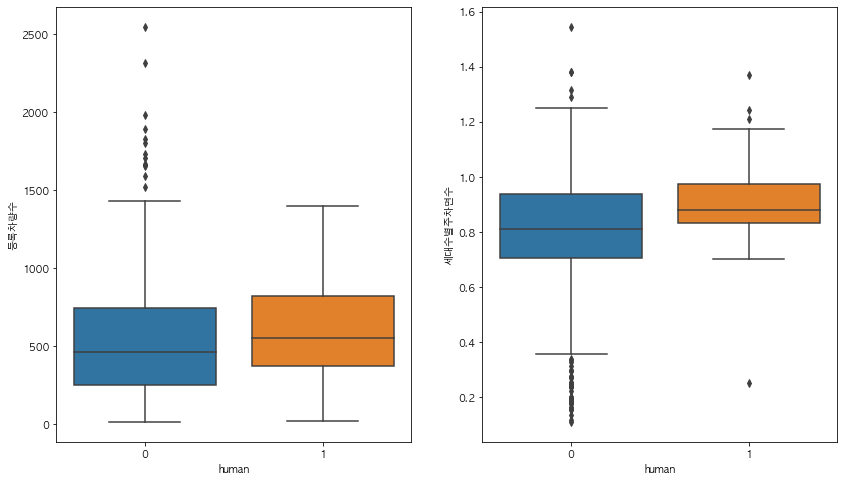

In [27]:
plt.rcParams["figure.figsize"] = (14,8)
plt.subplot(1,2,1)
sns.boxplot(tmp.human, tmp.등록차량수)
plt.subplot(1,2,2)
sns.boxplot(tmp.human, tmp.세대수별주차면수)
plt.show()

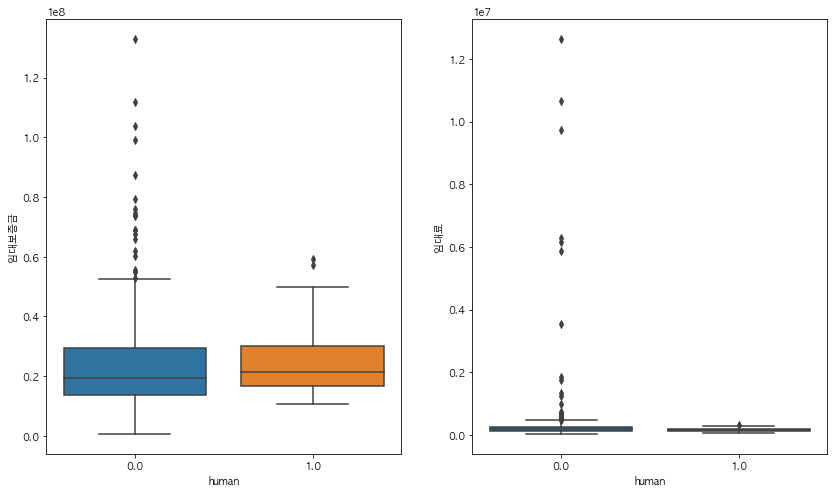

In [28]:
plt.rcParams["figure.figsize"] = (14,8)
plt.subplot(1,2,1)
sns.boxplot( train.groupby("단지코드").mean()["human"],train.groupby("단지코드").mean()["임대보증금"])
plt.subplot(1,2,2)
sns.boxplot( train.groupby("단지코드").mean()["human"],train.groupby("단지코드").mean()["임대료"])
plt.show()

휴먼시아 의미없어 보인다

## 주공아파트

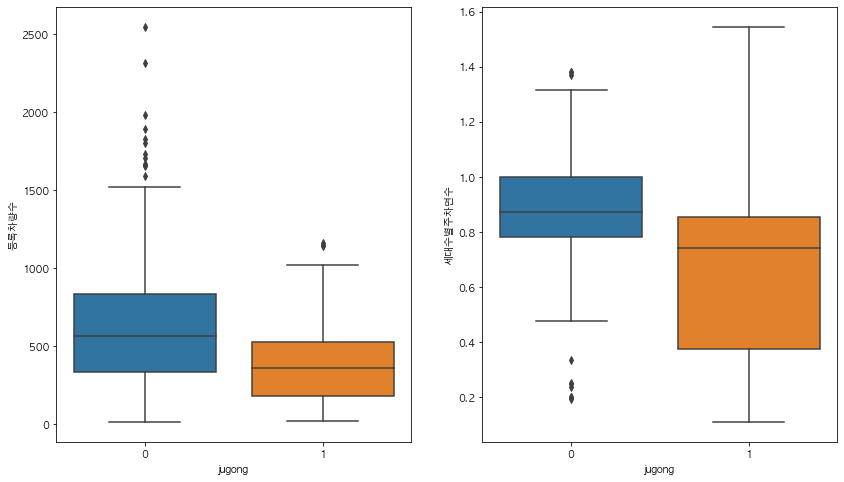

In [29]:
plt.subplot(1,2,1)
sns.boxplot(tmp.jugong, tmp.등록차량수)
plt.subplot(1,2,2)
sns.boxplot(tmp.jugong, tmp.세대수별주차면수)
plt.show()

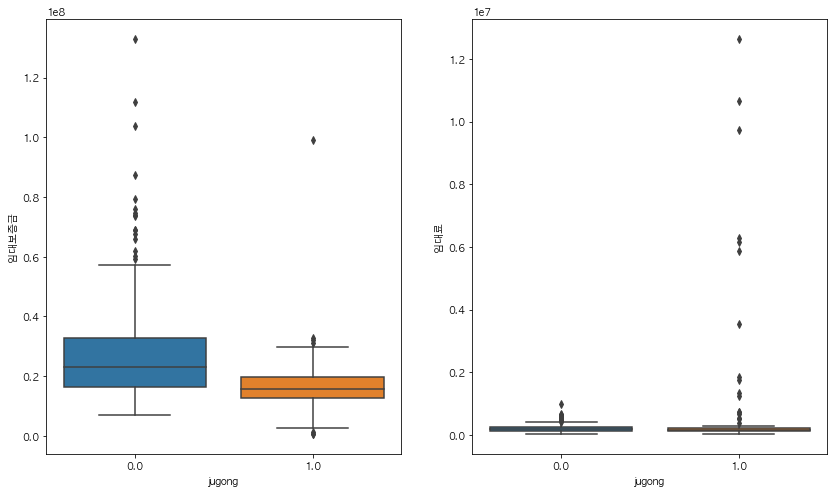

In [30]:
plt.subplot(1,2,1)
sns.boxplot(train.groupby("단지코드").mean()["jugong"],train.groupby("단지코드").mean()["임대보증금"])
plt.subplot(1,2,2)
sns.boxplot(train.groupby("단지코드").mean()["jugong"],train.groupby("단지코드").mean()["임대료"])
plt.show()

In [31]:
train.groupby("단지코드").mean().groupby("jugong").mean()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철역,버스정류장,단지내주차면수,등록차량수,연면적,위도,경도,subway_dist,환승역 수,총인구수,세대당_인구,남/여비율,남/여_0~19세,남/여_20~39세,남/여_40~69세,남/여_70세이상,0~19세_비율,20~39세_비율,40~69세_비율,70세이상_비율,세대수별주차면수,human
jugong,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0000,752.1385,44.9778,130.7880,15.2365,"27,701,483.2528","212,597.4377",0.1453,3.6216,664.2331,639.5405,"4,291.9263",127.6291,36.2231,0.2460,1.0980,"32,958.8150",2.3195,0.9972,2.0450,1.0951,1.0074,0.6949,0.1955,0.2546,0.4507,0.0992,0.8734,0.3784
1.0000,655.7627,46.4200,121.9729,8.9576,"16,463,852.9009","676,766.7657",0.1356,3.9153,390.9153,395.9237,"2,310.7559",127.8875,36.1858,0.2985,1.0424,"26,380.4054",2.2358,0.9986,1.8585,1.1608,1.0071,0.6568,0.1776,0.2319,0.4713,0.1192,0.6729,0.0085
